In [1]:
import pandas as pd

review = pd.read_csv('/content/covid19.csv', on_bad_lines = 'skip')
review

,Unnamed: 0,Province/State,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
0,0,NaN,Afghanistan,1/22/20,33.000000,65.000000,0,0,0
1,1,NaN,Albania,1/22/20,41.153300,20.168300,0,0,0
2,2,NaN,Algeria,1/22/20,28.033900,1.659600,0,0,0
3,3,NaN,Andorra,1/22/20,42.506300,1.521800,0,0,0
4,4,NaN,Angola,1/22/20,-11.202700,17.873900,0,0,0
...,...,...,...,...,...,...,...,...,...
37039,37039,NaN,Sao Tome and Principe,6/16/20,0.186360,6.613081,671,12,182
37040,37040,NaN,Yemen,6/16/20,15.552727,48.516388,885,214,91
37041,37041,NaN,Comoros,6/16/20,-11.645500,43.333300,197,3,127
37042,37042,NaN,Tajikistan,6/16/20,38.861034,71.276093,5160,50,3624


In [ ]:
import pandas as pd
population = pd.read_csv('/content/population.csv' , on_bad_lines = 'skip')
population

In [ ]:
review['Province/State'] = review['Province/State'].fillna(0)
review_fix = review
review_fix

In [113]:
#get ther newest data
data_new_date = review.loc[review_fix['date'] ==  review_fix['date'].max()]
data_new_date

,Unnamed: 0,Province/State,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
36792,36792,0,Afghanistan,2020-06-16,33.000000,65.000000,26310,491,5508
36793,36793,0,Albania,2020-06-16,41.153300,20.168300,1672,37,1064
36794,36794,0,Algeria,2020-06-16,28.033900,1.659600,11147,788,7842
36795,36795,0,Andorra,2020-06-16,42.506300,1.521800,854,52,789
36796,36796,0,Angola,2020-06-16,-11.202700,17.873900,148,6,64
...,...,...,...,...,...,...,...,...,...
37039,37039,0,Sao Tome and Principe,2020-06-16,0.186360,6.613081,671,12,182
37040,37040,0,Yemen,2020-06-16,15.552727,48.516388,885,214,91
37041,37041,0,Comoros,2020-06-16,-11.645500,43.333300,197,3,127
37042,37042,0,Tajikistan,2020-06-16,38.861034,71.276093,5160,50,3624


In [6]:
#get confirmed case and infection rate

total_cf = data_new_date['confirmed'].sum()
print(f"total confirmed cases: {total_cf}") 
popu = population['Population (2020)'].sum()
inf_rate = (total_cf/popu)*100
round_if = round(inf_rate,3)
print(f"Infection rate: {round_if}%")

total confirmed cases: 7144451
Infection rate: 0.092%


In [7]:
#get total recoveries and recovery rate
total_rec = data_new_date['recoveries'].sum()
print(f"Total recoveries: {total_rec}")
rec_rate = round(((total_rec/total_cf)*100),3)
print(f"Recovery rate: {rec_rate}%")

Total recoveries: 3319551
Recovery rate: 46.463%


In [8]:
#get total deaths and fatality rate
total_death = data_new_date['deaths'].sum()
print(f"Total deaths: {total_death}")
fa_rate = round(((total_death/total_cf)*100),3)
print(f"Fatality rate: {fa_rate}%")

Total deaths: 403491
Fatality rate: 5.648%


In [95]:
review['date'] = pd.to_datetime(review['date'])
sort_date = review.groupby(pd.Grouper(key='date',
                      freq='1D', sort=True)).sum()
date_range = pd.date_range(start ='1-22-2020', 
         end ='6-16-2020', freq ='1D')
sort_date

,Unnamed: 0,Lat,Long,confirmed,deaths,recoveries
date,,,,,,
2020-01-22,31626,4953.6189,7232.907146,555,17,28
2020-01-23,95130,4953.6189,7232.907146,654,18,30
2020-01-24,158634,4953.6189,7232.907146,941,26,36
2020-01-25,222138,4953.6189,7232.907146,1434,42,39
2020-01-26,285642,4953.6189,7232.907146,2117,56,52
...,...,...,...,...,...,...
2020-06-12,9049194,4953.6189,7232.907146,7544665,417655,3561378
2020-06-13,9112698,4953.6189,7232.907146,7678838,421864,3646502
2020-06-14,9176202,4953.6189,7232.907146,7812022,425173,3716463


In [96]:
#get death rec and ongoing
death_data = []
numlen = len(date_range)
for i in range(numlen):
    dat = sort_date.iloc[i , 4]
    death_data.append(dat) 


rec_data = []
for i in range(numlen):
    dat = sort_date.iloc[i , 5]
    rec_data.append(dat) 

rem_data = []
cf_data = [] 
for i in range(numlen):
    all = sort_date.iloc[i , 3]
    cf_data.append(all)
    death = sort_date.iloc[i , 4]
    rec = sort_date.iloc[i , 5]
    dat = all - death - rec
    rem_data.append(dat)
   

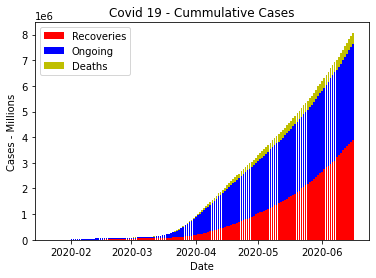

In [52]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = date_range
y1 = np.array(rec_data)
y2 = np.array(rem_data)
y3 = np.array(death_data)

 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')

plt.ylabel("Cases - Millions")
plt.xlabel("Date")
plt.legend(["Recoveries", "Ongoing", "Deaths"])
plt.title("Covid 19 - Cummulative Cases")
plt.show()

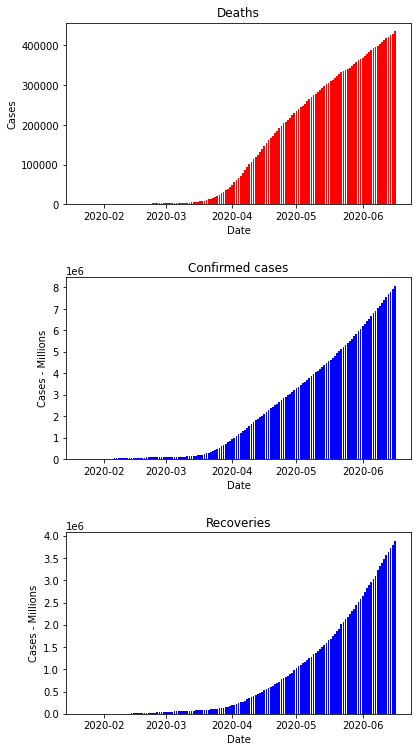

In [97]:

# importing library
import matplotlib.pyplot as plt
 
# Some data to display
date = date_range
death = death_data
rec = rec_data
cf = cf_data
# Creating subplots

fig, ax = plt.subplots(3)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.5,
                    wspace=0.4,
                    hspace=0.4)

# Accessing each axes object to plot the data through returned array
ax[0].bar(date,death, color = 'r')
ax[1].bar(date, cf, color = 'b')
ax[2].bar(date, rec, color = 'b')

ax[0].set(xlabel='Date', ylabel='Cases')
ax[1].set(xlabel='Date', ylabel='Cases - Millions')
ax[2].set(xlabel='Date', ylabel='Cases - Millions')

ax[0].title.set_text("Deaths")
ax[1].title.set_text("Confirmed cases")
ax[2].title.set_text("Recoveries")

In [108]:
#Vietnam cummulative cases
af = review.loc[review['Country/Region'] == 'Vietnam']
af

,Unnamed: 0,Province/State,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
37009,37009,0,Vietnam,2020-06-16,16.0,108.0,334,0,325
36757,36757,0,Vietnam,2020-06-15,16.0,108.0,334,0,323
36505,36505,0,Vietnam,2020-06-14,16.0,108.0,334,0,323
36253,36253,0,Vietnam,2020-06-13,16.0,108.0,334,0,323
36001,36001,0,Vietnam,2020-06-12,16.0,108.0,333,0,323
...,...,...,...,...,...,...,...,...,...
1729,1729,0,Vietnam,2020-01-28,16.0,108.0,2,0,0
1981,1981,0,Vietnam,2020-01-29,16.0,108.0,2,0,0
2233,2233,0,Vietnam,2020-01-30,16.0,108.0,2,0,0
2485,2485,0,Vietnam,2020-01-31,16.0,108.0,2,0,0


In [104]:
death_data_vn = []
numlen = len(date_range)
for i in range(numlen):
    dat = af.iloc[i , 7]
    death_data_vn.append(dat) 


rec_data_vn = []
for i in range(numlen):
    dat = af.iloc[i , 8]
    rec_data_vn.append(dat) 

rem_data_vn = []
cf_data_vn = [] 
for i in range(numlen):
    all = af.iloc[i , 6]
    cf_data_vn.append(all)
    death = af.iloc[i , 7]
    rec = af.iloc[i , 8]
    dat = all - death - rec
    rem_data_vn.append(dat)

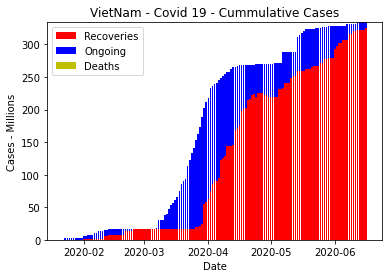

In [106]:
# Creating chart
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = date_range
y1 = np.array(rec_data_vn)
y2 = np.array(rem_data_vn)
y3 = np.array(death_data_vn)

 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')

plt.ylabel("Cases - Millions")
plt.xlabel("Date")
plt.legend(["Recoveries", "Ongoing", "Deaths"])
plt.title("VietNam - Covid 19 - Cummulative Cases")
plt.show()

In [132]:
data_sort = data_new_date.sort_values(by=['confirmed'], ascending=False)
top_5 = data_sort.head(5)



,Unnamed: 0,Province/State,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
37006,37006,0,US,2020-06-16,37.0902,-95.7129,2137731,116963,583503
36820,36820,0,Brazil,2020-06-16,-14.2350,-51.9253,923189,45241,490005
36968,36968,0,Russia,2020-06-16,60.0000,90.0000,544725,7274,293780
36912,36912,0,India,2020-06-16,21.0000,78.0000,354065,11903,186935
37004,37004,0,United Kingdom,2020-06-16,55.3781,-3.4360,298136,41969,0


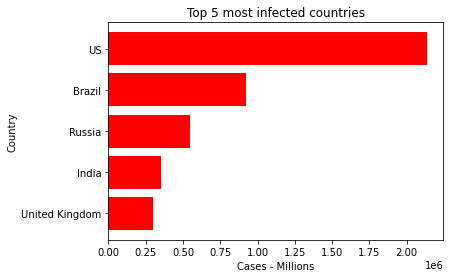

In [139]:
# Top 5 covid 19 cases confirmed
import matplotlib.pyplot as plt
import numpy as np
 
# data
x = top_5['Country/Region']
y = top_5['confirmed']

plt.barh(x, y, color='r')
plt.gca().invert_yaxis()
plt.xlabel("Cases - Millions")
plt.ylabel("Country")
plt.title("Top 5 most infected countries")
plt.show()

In [140]:
#top 5 most recover
data_sort_rec = data_new_date.sort_values(by=['recoveries'], ascending=False)
top_5_rec = data_sort_rec.head(5)

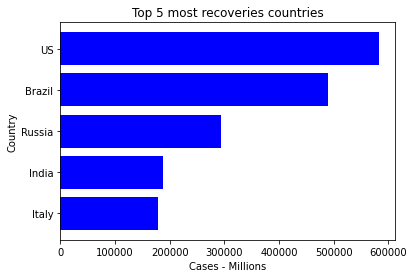

In [142]:
# Top 5 covid 19 cases recoveries
import matplotlib.pyplot as plt
import numpy as np
 
# data
x = top_5_rec['Country/Region']
y = top_5_rec['recoveries']

plt.barh(x, y, color='b')
plt.gca().invert_yaxis()
plt.xlabel("Cases - Millions")
plt.ylabel("Country")
plt.title("Top 5 most recoveries countries")
plt.show()